# Superposition for a Particle in a Box

In [149]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

## Initializing Parameters

In [115]:
h_bar = 1
L = 1
m = 1
t = 0.1
z = np.linspace(0,L,500)

## Calculating Wavefunctions for n = 1, 2

We have,
$$\psi(z) = \sqrt{\dfrac{2}{L}}\sin\dfrac{n\pi}{L}z$$

In [146]:
psi_1 = np.sqrt(2/L)*np.sin(np.pi*z/L)
psi_2 = np.sqrt(2/L)*np.sin(2*np.pi*z/L)

Plotting solutions of wavefunctions for both states.

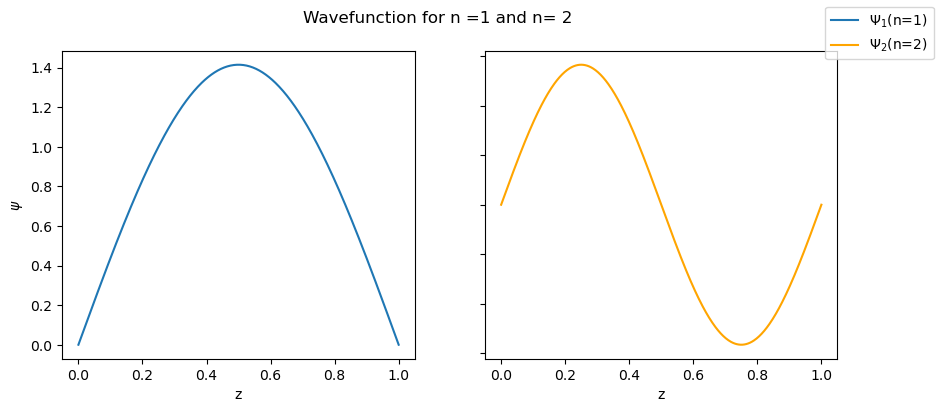

In [117]:
fig, axes = plt.subplots(1,2,figsize =(10,4))
axes[0].plot(z,psi_1,label=r'$\Psi_1$(n=1)')
axes[1].plot(z,psi_2,color='orange',label=r'$\Psi_2$(n=2)')
fig.suptitle("Wavefunction for n =1 and n= 2")
for ax in axes.flat:
    ax.set(xlabel='z',ylabel=r'$\psi$')
    ax.label_outer()
fig.legend()

## Energy of states

Energy of nth state is given by,
$$E_n = \dfrac{\hbar^2}{2m}\left(\dfrac{n\pi}{L}\right)^2$$

In [118]:
E_1 = h_bar**2/(2*m)*(1*np.pi/L)**2
E_2 = 4*E_1

We define time dependent factor,
$e^{-i\frac{E_nt}{\hbar}}$

In [119]:
factor_1 = np.exp(-1j* E_1*t/h_bar)
factor_2 = np.exp(-1j* E_2*t/h_bar)

## Probability Density

Calculate probability density of a wavefunction,
$$\text{Probability Density}= |\psi(z)|^2$$ 

In [120]:
pd_1 = np.abs(psi_1)**2
pd_2 = np.abs(psi_2)**2

Plot for probability density of states

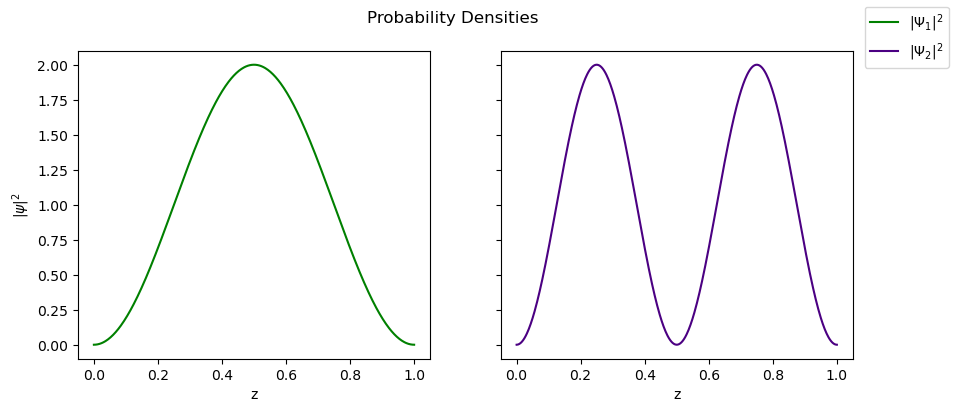

In [121]:
fig, axes = plt.subplots(1,2,figsize =(10,4))
axes[0].plot(z,pd_1,color='green',label=r'$|\Psi_1|^2$')
axes[1].plot(z,pd_2,color='indigo',label=r'$|\Psi_2|^2$')
fig.suptitle("Probability Densities")
for ax in axes.flat:
    ax.set(xlabel='z',ylabel=r'$|\psi|^2$')
    ax.label_outer()
fig.legend()

## Obtaining probability density of superposition between first and second states

$$\psi(z,t) = \dfrac{1}{\sqrt(2)}\left(\psi_1(z) e^{\frac{-iE_1t}{\hbar}} + \psi_2(z) e^{\frac{-iE_2t}{\hbar}}\right)$$

In [148]:
psi = (1/np.sqrt(2))*(psi_1*factor_1 + psi_2*factor_2)

Then probability density of superposition,

In [123]:
prob_density = np.abs(psi)**2

Obtaining plot

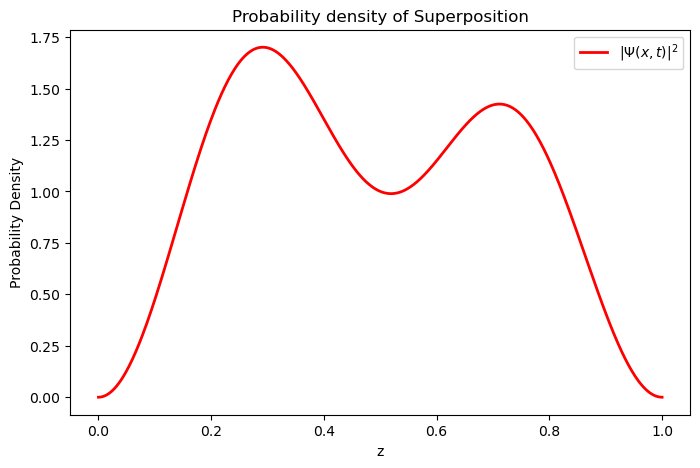

In [124]:
plt.figure(figsize=(8, 5))
plt.plot(z,prob_density,color='red',label=r'$|\Psi(x,t)|^2$',lw=2)
plt.title("Probability density of Superposition")
plt.xlabel("z")
plt.ylabel("Probability Density")
plt.legend()

## Animating the oscillatory nature of superposition

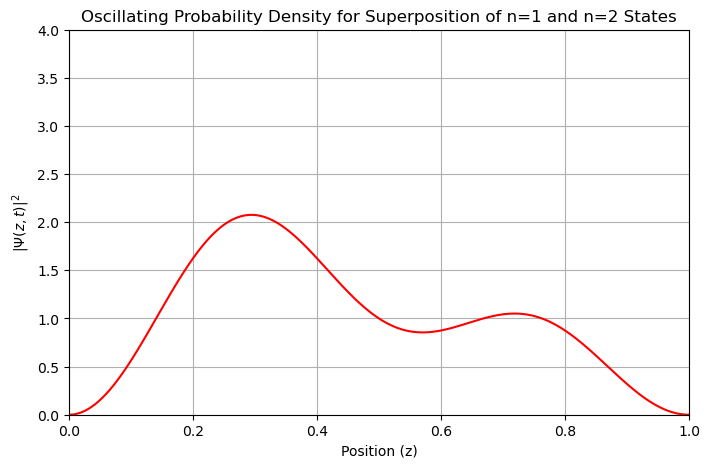

In [144]:
fig, ax = plt.subplots(figsize=(8, 5))
line, = ax.plot(z, np.zeros_like(z), color='red',label=r'$|\Psi(x, t)|^2$')
ax.set_xlim(0, L)
ax.set_ylim(0, 4)
ax.set_xlabel('Position (z)')
ax.set_ylabel(r'$|\Psi(z, t)|^2$')
ax.set_title('Oscillating Probability Density for Superposition of n=1 and n=2 States')
ax.grid(True)

def update(t):
    factor_1 = np.exp(-1j * E_1 * t / h_bar)
    factor_2 = np.exp(-1j * E_2 * t / h_bar)
    Psi = (1 / np.sqrt(2)) * (psi_1 * factor_1 + psi_2 * factor_2)
    prob_density = np.abs(Psi)**2
    line.set_ydata(prob_density)
    return line,
ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 500), blit=True, interval=50)
ani.save('superposition_oscillation.mp4', writer='ffmpeg')

This saves the animation video in your current directory.